<a href="https://colab.research.google.com/github/yeahjinjeong/ITmining2022/blob/main/8%EC%A1%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EB%B0%8F_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
google = pd.read_csv("/content/drive/My Drive/Colab Notebooks/team_project/Google-Playstore3.csv")

In [ ]:
display(google)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,In App Purchases,Editors Choice,Update,Size(k),Ranking,Ad Supported
0,Ampere Battery Info,com.webserveis.batteryinfo,42,4.4,64.0,5000.0,7662,1,0.0,7,5,2020,2021,1,0,0,1,2900.0,514983,True
1,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,13,5.0,5.0,10.0,19,1,0.0,7,4,2018,2018,1,0,0,0,1800.0,1157496,True
2,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,23,4.5,12.0,1000.0,2567,1,0.0,7,4,2019,2019,1,0,0,0,2500.0,729913,True
3,The Everyday Calendar,com.mozaix.simoneboard,24,2.0,39.0,500.0,702,1,0.0,7,5,2019,2019,1,0,0,0,16000.0,959486,False
4,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,31,4.7,820.0,50000.0,62433,1,0.0,7,4,2019,2020,1,0,0,1,3500.0,209671,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161044,Hopeless 2: Cave Escape,com.upopa.hopeless2,0,4.3,103466.0,5000000.0,7274660,1,0.0,7,4,2015,2017,4,1,0,1,37000.0,8333,True
1161045,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,28,4.0,344.0,500000.0,814548,1,0.0,7,2,2014,2014,1,0,0,0,4100.0,47450,False
1161046,Lero TOEFL Recorder + Timer,com.toefltimer,15,3.4,17.0,1000.0,1980,1,0.0,7,4,2018,2018,1,0,0,0,10000.0,781797,True
1161047,Devi Suktam,ishan.devi.suktam,28,3.5,8.0,1000.0,2635,1,0.0,7,5,2016,2021,1,0,0,1,10000.0,724655,True


모델에 사용될 독립변수와 App Name, App ID만 남기고 제거

In [ ]:
google = google.drop('Category', axis=1)
google = google.drop('Installs Range', axis=1)
google = google.drop('Ranking', axis=1)

In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 6.6 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 9.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=10a169c3bbe1f4e6720669e8a13806171353c5584f9754618666af57b4ed8b63
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import mglearn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = google.iloc[:, 2:15] 
y = google['Ad Supported']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
#x 독립변수 y 종속변수

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train))) #정확도 1은 overfitting
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.994
시험용 데이터 정확도: 0.624


In [ ]:
tree = DecisionTreeClassifier(max_depth=14, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.722
시험용 데이터 정확도: 0.704


In [ ]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.727
시험용 데이터 정확도: 0.726


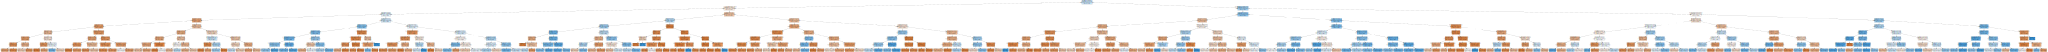

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "False", "True"],
                feature_names=google.columns[2:18], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [9.16549378e-02 7.11809848e-02 3.09819020e-01 1.70445672e-03
 7.38823447e-02 0.00000000e+00 1.48566984e-01 8.31069052e-02
 5.04730772e-02 4.47116087e-02 6.07212870e-02 4.83743706e-05
 6.41300187e-02]


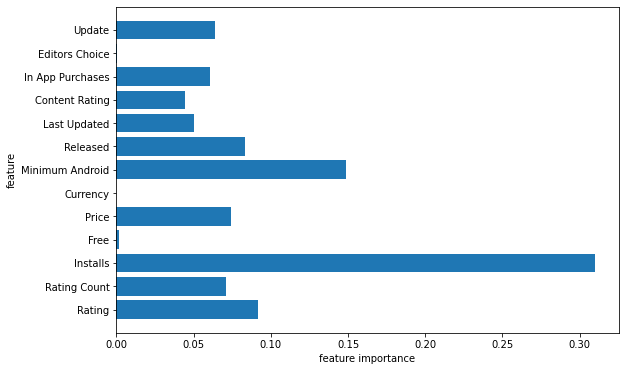

In [ ]:
import numpy as np

def plot_feature_importances_gps(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(google.columns[2:15])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), google.columns[2:18])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_gps(tree)

In [ ]:
res = pd.DataFrame(result)
res["feature"] = google.columns[2:15]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='feature'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        13 non-null     float64
 1   feature  13 non-null     object 
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


None

,0,feature
9,0.044712,Content Rating
5,0.000000,Currency
11,0.000048,Editors Choice
3,0.001704,Free
10,0.060721,In App Purchases
2,0.309819,Installs
8,0.050473,Last Updated
6,0.148567,Minimum Android
4,0.073882,Price
0,0.091655,Rating


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.994
시험용 데이터 세트 정확도: 0.685


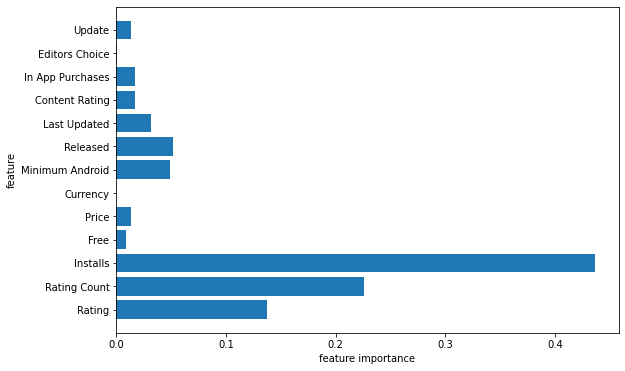

In [ ]:
plot_feature_importances_gps(forest)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.704
시험용 데이터 세트 정확도: 0.705


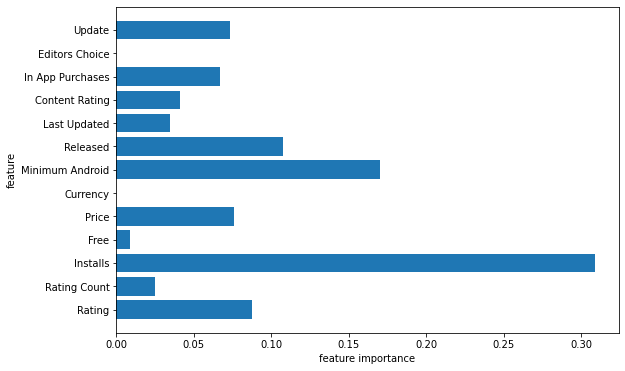

In [ ]:
plot_feature_importances_gps(gbrt)

In [ ]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.70192584 0.70092674 0.70264932 0.70176506 0.70452118 0.70370583
 0.70068215 0.70299042 0.70432256 0.70427663]
Random forest:  [0.68386178 0.68606668 0.68528577 0.68372397 0.68656048 0.68710022
 0.68395002 0.6863272  0.68376628 0.68431751]
Gradient boosting:  [0.70171913 0.70368286 0.70391254 0.70207513 0.70460157 0.70539395
 0.70301339 0.70348423 0.70491973 0.70426514]
Accuracy mean
Decision tree :0.703
Random forest :0.685
Gradient boosting :0.704


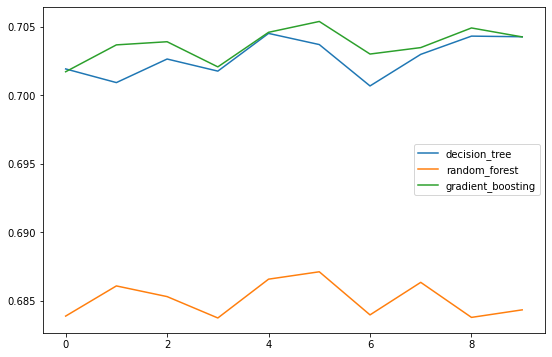

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient_boosting',gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
# cv=3 3번 테스트. 세 번의 평균 mean_test_score. 
print(grid_gbrt)
# 사용된 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


KeyboardInterrupt: ignored

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_)) #mean_test_score

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.7689


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.770
